# Stock Price Prediction Using LSTM

Predicting stock prices is an uncertain task using machine learning. There are a lot of tools used for stock market prediction. The stock market is considered to be dynamic and complex. This article will discuss the LSTM Network, one of the popular deep learning techniques used in stock price prediction. In this article, we will fetch the historical data of stock automatically using python libraries and fit the LSTM model on this data to predict the future prices of the store.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

The yfinance library allows you to easily fetch historical stock price data for a specific stock symbol. You need to provide the stock symbol, start date, and end date for the historical data you want to fetch

In [54]:
# Define the stock symbol and fetch historical data using yfinance
stock_symbol = 'AAPL'  # Replace with the desired stock symbol
start_date = '2010-01-01'
end_date = '2023-01-01'
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


Otherwise,you can click the below link to see the dataset

__[CLICK for the DATASET](https://finance.yahoo.com/quote/AAPL/history?p=AAPL)__

In [24]:
df=pd.read_csv("C:\\Users\\sharanji\\Downloads\\AAPL.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-26,170.570007,171.050003,163.559998,163.619995,162.655060,78961000
1,2022-08-29,161.149994,162.899994,159.820007,161.380005,160.428268,73314000
2,2022-08-30,162.130005,162.559998,157.720001,158.910004,157.972855,77906200
3,2022-08-31,160.309998,160.580002,157.139999,157.220001,156.292816,87991100
4,2022-09-01,156.639999,158.419998,154.669998,157.960007,157.028458,74229900
5,2022-09-02,159.750000,160.360001,154.970001,155.809998,154.891113,76957800
6,2022-09-06,156.470001,157.089996,153.690002,154.529999,153.618683,73714800
7,2022-09-07,154.820007,156.669998,153.610001,155.960007,155.040237,87449600
8,2022-09-08,154.639999,156.360001,152.679993,154.460007,153.549088,84923800
9,2022-09-09,155.470001,157.820007,154.750000,157.369995,156.441910,68028800


In [55]:
# Extract the 'Close' prices
stock_prices = stock_data['Close'].values.reshape(-1, 1)

In [56]:
# Normalize the data
scaler = MinMaxScaler()
stock_prices_scaled = scaler.fit_transform(stock_prices)

In [57]:
# Split the data into training and testing sets
train_size = int(len(stock_prices_scaled) * 0.8)
train_data = stock_prices_scaled[:train_size]
test_data = stock_prices_scaled[train_size:]

In [58]:
# Create sequences for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Length of the input sequences
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [59]:
# Reshape input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [60]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [61]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


C:\Users\sharanji\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


82/82 [==============================] - 11s 130ms/step - loss: 0.0022
Epoch 2/50
82/82 [==============================] - 10s 125ms/step - loss: 5.8726e-05
Epoch 3/50
82/82 [==============================] - 11s 129ms/step - loss: 5.4749e-05
Epoch 4/50
82/82 [==============================] - 11s 128ms/step - loss: 5.2571e-05
Epoch 5/50
82/82 [==============================] - 10s 126ms/step - loss: 4.9928e-05
Epoch 6/50
82/82 [==============================] - 11s 129ms/step - loss: 4.9660e-05
Epoch 7/50
82/82 [==============================] - 10s 125ms/step - loss: 4.8433e-05
Epoch 8/50
82/82 [==============================] - 11s 129ms/step - loss: 5.0784e-05
Epoch 9/50
82/82 [==============================] - 10s 126ms/step - loss: 4.7757e-05
Epoch 10/50
82/82 [==============================] - 10s 123ms/step - loss: 4.7166e-05
Epoch 11/50
82/82 [==============================] - 10s 126ms/step - loss: 4.9526e-05
Epoch 12/50
82/82 [==============================] - 10s 125ms/step

In [62]:
# Predict stock prices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

21/21 [==============================] - 1s 46ms/step


In [63]:
# Inverse transform to get actual stock prices
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test)

In [64]:
# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.791896283148772
Testing RMSE: 3.4865973757375825


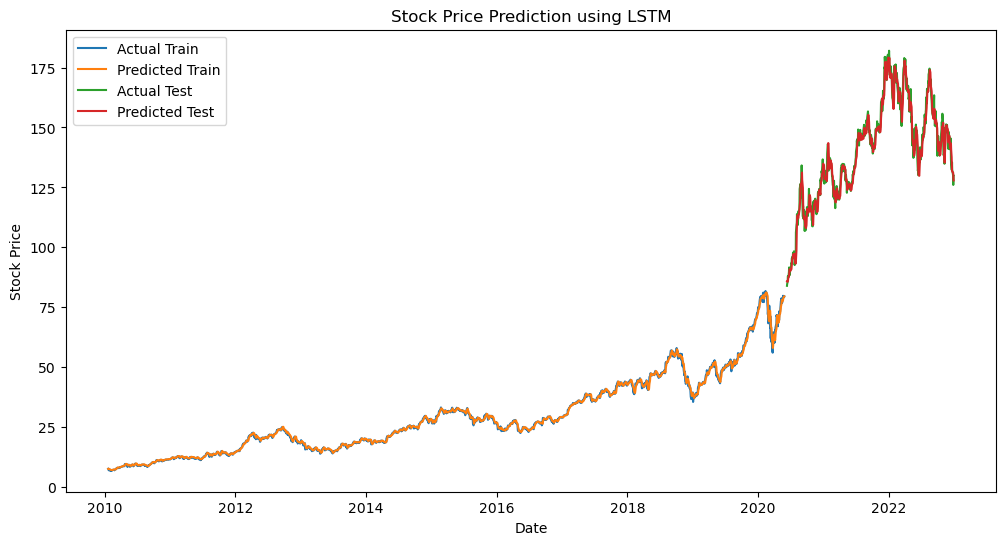

In [66]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[seq_length:seq_length+len(y_train_actual)], y_train_actual, label='Actual Train')
plt.plot(stock_data.index[seq_length:seq_length+len(y_train_actual)], train_predict, label='Predicted Train')
plt.plot(stock_data.index[train_size+seq_length:], y_test_actual, label='Actual Test')
plt.plot(stock_data.index[train_size+seq_length:], test_predict, label='Predicted Test')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.show()


In conclusion, this code demonstrates the process of using an LSTM neural network to predict stock prices based on historical data. Keep in mind that stock price prediction is a complex task influenced by numerous factors, and the performance of such models can vary widely.